Initialisations:


We import the numpy package;

We specify the true value of the scalar variable we are trying to estimate;

We specify an initial estimate, with expected error, and also the number of measurements that will be taken.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

TrueVal = 120
Est0 = 100
EstErr0 = 5
N = 125
MeasErr = 12

Iterations:

We generate a measurement by sampling from a normal distribution with mean given by the true value, and a specified variance;

We calculate the Kalman gain;

We update the estimate of the temperature;

We calculate a new value for the expected error in our estimate.

In [2]:
def plot_values(X,Y,Z):
    plt.plot(list(range(0,N-1)) + 0.5*np.ones(N-1), X,'ro',label='Measurements')
    plt.plot(Y,'b',label='Estimates')
    plt.plot(Z,'k--',label='True value')
    plt.xlabel('Time')
    plt.legend()
    plt.show()

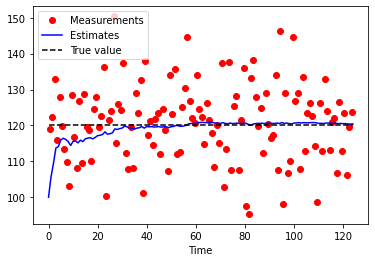

In [121]:
Estimates = np.zeros(N)
Measurements = np.zeros(N-1)

i = 0
Estimates[0] = Est0
Est = Est0
EstErr = EstErr0

while i < N-1:
    Measurements[i] = np.random.normal(TrueVal , MeasErr)
    KG = EstErr/(EstErr + MeasErr)
    Est = Est + KG*(Measurements[i] - Est)
    i = i+1
    Estimates[i] = Est
    EstErr = MeasErr*EstErr/(MeasErr + EstErr)
    
plot_values(Measurements, Estimates, TrueVal*np.ones(N))